In [62]:
import numpy as np                            #importing the required libraries 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
font = {'family' : 'times new roman',
        'size'   : 12}

matplotlib.rc('font', **font)

In [49]:
def yeoh(x,c1,c2,c3):         #defining Yeoh's  3rd Order Hyperelastic equation
  s=0                         #c1,c2,c3 are the Yeoh constants
  c=[c1,c2,c3]                
  t=x+1                       # s,x,t are respectively stress, strain and principal strain ratio
  for i in range(1,4):
    s+= i*c[i-1]*((t*t + 2/t - 3)**(i-1))
  s*=2*(t- t**-2)
  return s 


In [50]:
def load(file):                                   #defining function for loading csv files for stress-strain data 
  df = pd.read_csv(file)
  df=df.values
  return df


In [51]:
dfb=load("base.csv")                  #loading all files 
df0=load("0.csv")                     
df4=load("4degree.csv")
df6=load("6.5degree.csv")
df10=load("10degree.csv")
df14=load("14.5degree.csv")
xb,yb=dfb[:,3], dfb[:,2]          #processing the data into a Pandas DataFrame
x0, y0 = df0[:, 3], df0[:, 2]
x10, y10 = df10[:, 3], df10[:, 2]
x4, y4 = df4[:, 3], df4[:, 2]
x6, y6 = df6[:, 3], df6[:, 2]
x14, y14 = df14[:, 3], df14[:, 2]




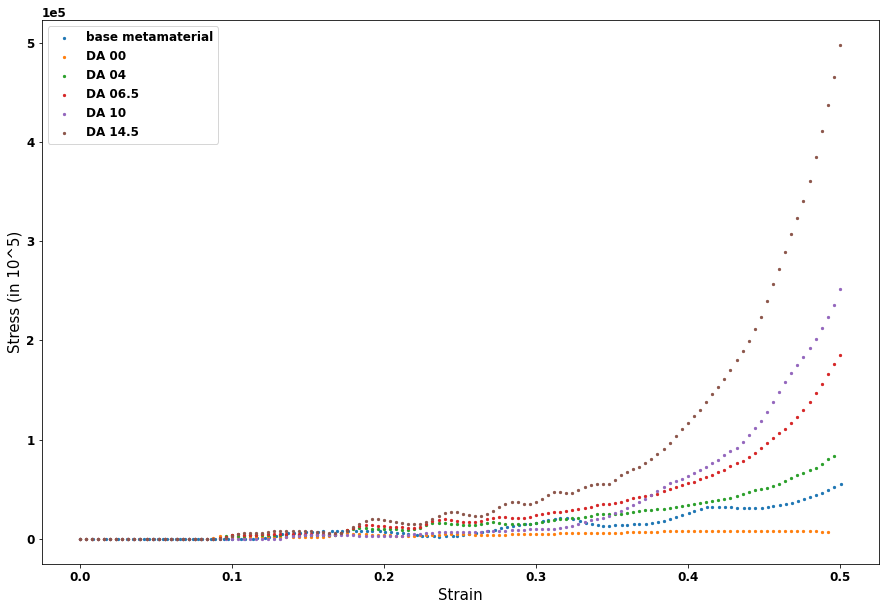

In [64]:
# plotting the data points
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(xb,yb,s=5, label='base metamaterial')
plt.scatter(x0, y0,s=5,label='DA 00')
plt.scatter(x4, y4,s=5, label='DA 04')
plt.scatter(x6, y6,s=5, label='DA 06.5')
plt.scatter(x10, y10,s=5, label='DA 10')
plt.scatter(x14, y14,s=5, label='DA 14.5')
plt.xlabel('Strain')
plt.ylabel('Stress (in 10^5)')
axes = plt.gca()

axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)


plt.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
plt.legend()
plt.show()

In [10]:

cb,cov= curve_fit(yeoh,xb,yb)  #calculating the constants for each type of 
c0,covq= curve_fit(yeoh,x0,y0) #metamaterial by optimizing the function defined
c4,cov= curve_fit(yeoh,x4,y4)  # in [1]
c6,cov= curve_fit(yeoh,x6,y6)
c10,cov= curve_fit(yeoh,x10,y10)
c14,cov= curve_fit(yeoh,x14,y14)

print(cb, 'base')
print(c0, '0 degree')
print(c4, '4 degrees')
print(c6, '6.5 degrees')
print(c10, '10 degrees')
print(c14, '14.5 degrees')


[ 4487.02350735  3484.75940377 14561.79976194] base
[ 2752.12969537  3957.04025603 -3556.40255611] 0 degree
[ 8267.63957673 -3135.60196707 32008.15719318] 4 degrees
[ 15198.30122251 -38664.92040325 106398.61905114] 6.5 degrees
[ 13860.19029394 -84867.76485583 194019.58188067] 10 degrees
[  37149.84201679 -168862.95926735  364805.6668386 ] 14.5 degrees


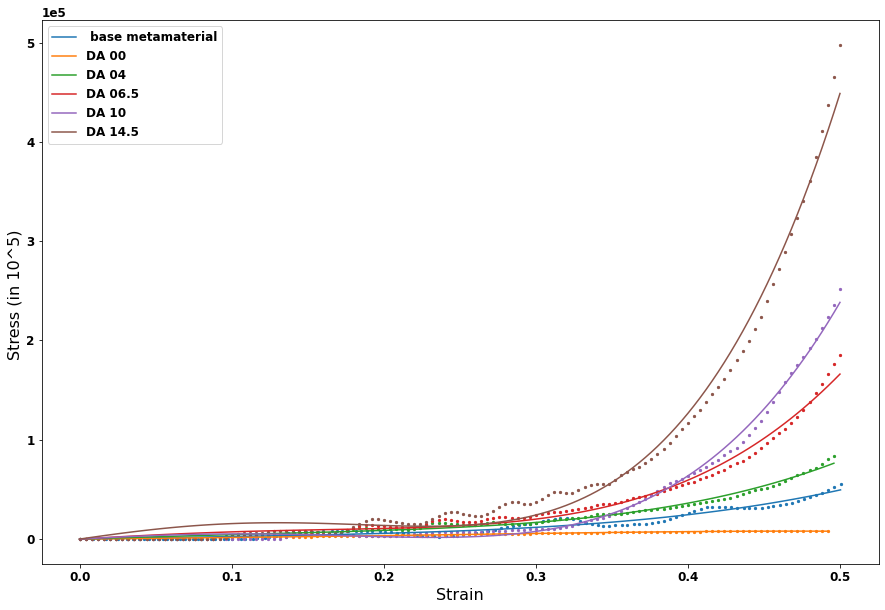

In [61]:
ylb = yeoh(xb,cb[0],cb[1],cb[2])           #Finally, the curves are plotted
yl0 = yeoh(x0,c0[0],c0[1],c0[2])           # with the above constants
yl4 = yeoh(x4,c4[0],c4[1],c4[2])
yl6 = yeoh(x6,c6[0],c6[1],c6[2])
yl10 = yeoh(x10,c10[0],c10[1],c10[2])
yl14 = yeoh(x14,c14[0],c14[1],c14[2])


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(xb,yb,s=5)
plt.scatter(x0,yl0,s=5)
plt.scatter(x4, y4,s=5)
plt.scatter(x6, y6,s=5)
plt.scatter(x10, y10,s=5)
plt.scatter(x14, y14,s=5)


plt.plot(xb, ylb, '-', label=' base metamaterial')
plt.plot(x0,yl0,'-', label='DA 00')
plt.plot(x4, yl4, '-', label='DA 04')
plt.plot(x6, yl6, '-', label='DA 06.5')
plt.plot(x10, yl10, '-', label='DA 10')
plt.plot(x14, yl14, '-', label='DA 14.5')
plt.legend()
plt.xlabel('Strain')
plt.ylabel('Stress (in 10^5) ')
axes = plt.gca()

axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
plt.show()



